In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python import pywrap_tensorflow
# import pandas as pd
# import seaborn as sns

In [18]:
import os
print("Current Dir ",os.getcwd())
curr_dir = os.getcwd()
train_path = os.path.join(curr_dir,"datasets","Train")
test_path = os.path.join(curr_dir,"datasets","Test")
valid_path = os.path.join(curr_dir,"datasets","Valid")

Current Dir  d:\aicte intern\Potato-Disease-Project


In [19]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    # batch_size=32,
    image_size=(128,128),
    shuffle=True,
    #seed=None,
    #validation_split=None,
    #subset=None,
    interpolation="bilinear",
    #follow_links=False,
    #crop_to_aspect_ratio=False
)

Found 900 files belonging to 3 classes.


In [20]:
training_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [21]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128,128),
    shuffle=True,
    interpolation="bilinear",
)

Found 300 files belonging to 3 classes.


In [22]:
validation_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [23]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=3,activation='softmax')) 

In [24]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
training_history=cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 74s 3s/step - accuracy: 0.9638 - loss: 0.0926 - val_accuracy: 0.9367 - val_loss: 0.1356
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 79s 3s/step - accuracy: 0.9854 - loss: 0.0416 - val_accuracy: 0.9533 - val_loss: 0.1633
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 77s 3s/step - accuracy: 0.9945 - loss: 0.0244 - val_accuracy: 0.9500 - val_loss: 0.1639
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 0.9872 - loss: 0.0282 - val_accuracy: 0.9600 - val_loss: 0.1158
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 77s 3s/step - accuracy: 1.0000 - loss: 0.0078 - val_accuracy: 0.9633 - val_loss: 0.1513
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.9500 - val_loss: 0.1633
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 77s 3s/step - accuracy: 0.9965 - loss: 0.0070 - val_accuracy: 0.9667 - val_loss: 0.1150
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 77s 3s/step - accuracy: 0.9969 - loss: 0.0039 - val_accuracy: 0.9633 - val_loss:

In [38]:
train_loss,train_acc=cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 18s 616ms/step - accuracy: 1.0000 - loss: 1.9026e-04
Training accuracy: 1.0


In [39]:
val_loss, val_acc=cnn.evaluate(validation_set)
print('Validation accuracy:',val_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 601ms/step - accuracy: 0.9650 - loss: 0.1060
Validation accuracy: 0.9599999785423279


In [40]:
cnn.save('trained_plant_disease_model.keras')

In [41]:
training_history.history

{'accuracy': [0.9688888788223267,
  0.9866666793823242,
  0.992222249507904,
  0.9888888597488403,
  1.0,
  1.0,
  0.9977777600288391,
  0.9988889098167419,
  1.0,
  1.0],
 'loss': [0.07788830995559692,
  0.038317423313856125,
  0.025753337889909744,
  0.02607477642595768,
  0.007905806414783001,
  0.0023967106826603413,
  0.005709158256649971,
  0.0021702537778764963,
  0.0008009432931430638,
  0.0007294522947631776],
 'val_accuracy': [0.9366666674613953,
  0.95333331823349,
  0.949999988079071,
  0.9599999785423279,
  0.9633333086967468,
  0.949999988079071,
  0.9666666388511658,
  0.9633333086967468,
  0.9566666483879089,
  0.9599999785423279],
 'val_loss': [0.1356499344110489,
  0.16330315172672272,
  0.16386817395687103,
  0.11583002656698227,
  0.1513039767742157,
  0.16328781843185425,
  0.11504814028739929,
  0.13407333195209503,
  0.16532255709171295,
  0.14636927843093872]}

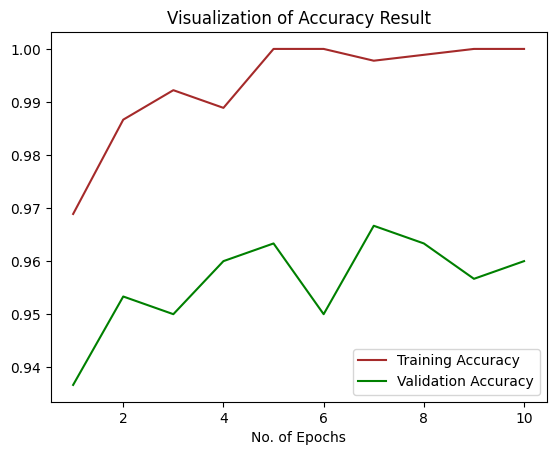

In [42]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='brown',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='green',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()